<a href="https://colab.research.google.com/github/jefoshub/stf-ilhas5/blob/main/M%C3%93DULO_5_MATRIZES_E_COMPARA%C3%87%C3%95ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÓDULO 5 - MATRIZES E COMPARAÇÕES

UFRRJ - MESTRADO INTERDISCIPLINAR EM HUMANIDADES DIGITAIS

Jeferson dos Santos Antunes Huaracha (jefsantunes@gmail.com)

Orientadores: Prof. Dr. Leandro Guimarães Marques Alvim 
              Prof. Dr. Rodrigo de Souza Tavares

Última verificação do funcionamento: Outubro/22

**Sobre este módulo**

Código desenvolvido para os fins da pesquisa

**Ilhas, Arquipélagos ou Continentes? Uma Análise Sobre a Geografia do Supremo Tribunal Federal**

Módulo voltado para a comparação de dados de ADIs e Hcs.

Nele são produzidas as matrizes de distâncias e similaridades. 

As matrizes de distâncias geradas nesse módulo são utilizadas na produção das visualizações gráficas construídas para as tarefas de análise. 




#Importando Bibliotecas

In [29]:
import pandas as pd
import re
from datetime import date

from sklearn.metrics.pairwise import cosine_similarity


# Funções de similaridade

In [30]:
import numpy as np
import scipy.stats as stats



def bin_entropy(v,s1=1,s2=-1):
    
    v = np.asarray(v)
    n1 = len(v[v==s1])
    n2 = len(v[v==s2])
    n  = float(n1+n2)
    if n1 == 0 or n2 == 0:
       return 0.0

    p1 = len(v[v == s1])/n
    p2 = len(v[v == s2])/n
    #print(v[v==s1],v[v==s2],len(v[v == s1]),len(v[v == s2]),p1,p2)
    return -( p1*np.log(p1) + p2*np.log(p2) ) 

def sim_entropy(v1,v2):

  v1     = np.asarray(v1)
  v2     = np.asarray(v2)
  
  # verifica se dimensões são iguais
  assert v1.shape == v2.shape
  
  v3     = v1*v2
  ii     = np.flatnonzero(v3) # indices da comnbinação dos vetores em que nenhum dos dois é zero. 
  states = []
  for idx in ii:
      if v1[idx] == v2[idx]:
         states.append(v1[idx])
  print("states: ", states)       
  # entropy (calcula a diversidade.) 
  en = bin_entropy(states)  
  print("entropia: ",en)
  # score
  s = 0
  for idx in ii:
      if v1[idx] == v2[idx]:
         s+=1
      #else:
      #   s-=1

  return en*(s/len(ii)) # a ideia é que votos que casam, mas variam entre 1 e -1 juntos são muito mais relacionados do que quando é constante


def sim_corr(v1,v2,corr = stats.pearsonr, verbose=False):
  
  
  v1     = np.asarray(v1)
  v2     = np.asarray(v2)
  
  # verifica se dimensões são iguais
  assert v1.shape == v2.shape
  
  v3     = v1*v2
  # v3 tem que ter pelo menos 3 elementos
  assert len(v3) > 2
  if len(v3[v3 == -1]) == 0:
     return 1 #(1.0,0)
  
  ii     = np.flatnonzero(v3) # indices da comnbinação dos vetores em que nenhum dos dois é zero. 
  if verbose:
     print('Índices da comnbinação dos vetores em que nenhum dos dois é zero.')
     print(v1[ii])
     print(v2[ii])
  
  return corr(v1[ii],v2[ii])[0]

#Verificando similaridade
def sim(v1,v2, verbose=False):
    
  v1     = np.asarray(v1)
  v2     = np.asarray(v2)
  
  # verifica se dimensões são iguais
  assert v1.shape == v2.shape
  
  v3     = v1*v2
  
  ii     = np.flatnonzero(v3) # indices da comnbinação dos vetores em que nenhum dos dois é zero. 
  if verbose:
     print(v1[ii])
     print(v2[ii])
  s = 0
  for idx in ii:
      if v1[idx] == v2[idx]:
         s+=1
      #else:
      #   s-=1
  try:
     return s/float(len(ii))
  except:
     print("Exceção: ",v1[ii],v2[ii],ii)
     return 0
  return 



In [31]:
#print(sim_entropy([1,1,0,0,0,0],[1,1,0,0,0,0])) # similares pouco positiva
#print(sim_entropy([1,1,1,1,1,0],[1,1,1,1,1,0])) # similares muito positiva
print(sim_entropy([1,-1,0,0],[1,-1,0,0])) # similares muito positiva
print(sim_entropy([1,1,0,0],[1,1,0,0])) # similares muito positiva

#bin_entropy([1,1])

states:  [1, -1]
entropia:  0.6931471805599453
0.6931471805599453
states:  [1, 1]
entropia:  0.0
0.0


#Escolha de Recorte

In [32]:
choice ='0'
#choice ='1'
while choice =='0':
    print("Escolha o período")
    print("1 - 2011 a 2013")
    print("2 - 2014 a 2016")
    print("3 - 2017 a 2019")
    print("4 - 2020 a 2022")
    print("5 - Fictícia")
    print("6 - Perspectivas com Marques e Mendoça")
        
    choice = input ("Digite o número e pressione ENTER : ")

    if choice == "1":
      print("Recorte 1")
      recorte='r1'
      
        
    elif choice == "2":
      print("Recorte 2")
      recorte='r2'
        
    elif choice == "3":
      print("Recorte 3")
      recorte='r3'

    elif choice == "4":
      print("Recorte 4")
      recorte='r4'

    elif choice == "5":
      print("Fictícia para exemplos e testes")
      recorte='FIC'

    elif choice == "6":
      print("Perspectivas (com Marques e Mendonça)")
      recorte='PER'
         
    else:
      print("opção Inválida")

Escolha o período
1 - 2011 a 2013
2 - 2014 a 2016
3 - 2017 a 2019
4 - 2020 a 2022
5 - Fictícia
6 - Perspectivas com Marques e Mendoça
Digite o número e pressione ENTER : 4
Recorte 4


# Carregando dataframes com votações por período


In [33]:
#carregando dados de votação
#Votos de ADIs

adis=pd.ExcelFile(f'ADIs-votos-{recorte}.xlsx')
df_a=adis.parse('Sheet1')

In [34]:
df_a.columns

Index(['ROBERTO BARROSO', 'EDSON FACHIN', 'LUIZ FUX', 'RICARDO LEWANDOWSKI',
       'GILMAR MENDES', 'CÁRMEN LÚCIA', 'ROSA WEBER', 'ALEXANDRE DE MORAES',
       'DIAS TOFFOLI', 'MARCO AURÉLIO', 'NUNES MARQUES'],
      dtype='object')

In [35]:
#Votos de HCs
hcs=pd.ExcelFile(f'HCs-votos-{recorte}.xlsx')
df_h=hcs.parse('Sheet1')

In [36]:

df_h.columns

Index(['ROBERTO BARROSO', 'EDSON FACHIN', 'LUIZ FUX', 'RICARDO LEWANDOWSKI',
       'GILMAR MENDES', 'CÁRMEN LÚCIA', 'ROSA WEBER', 'ALEXANDRE DE MORAES',
       'DIAS TOFFOLI', 'MARCO AURÉLIO', 'NUNES MARQUES'],
      dtype='object')

# Comparando Matrizes

In [37]:
#print(sim_entropy([1,1,0,0,0,0],[1,1,0,0,0,0])) # similares pouco positiva
#print(sim_entropy([1,1,1,1,1,0],[1,1,1,1,1,0])) # similares muito positiva
print(sim_entropy([1,-1,1,-1,0,0],[1,-1,1,-1,1,0])) # similares muito positiva



states:  [1, -1, 1, -1]
entropia:  0.6931471805599453
0.6931471805599453


In [38]:
#print(sim_corr([1,1,1,1,0,0],[1,1,1,1,0,0],verbose=False)) # similares pouco positiva
#print(sim_corr([1,1,-1,-1,1,0],[1,1,-1,-1,1,0],verbose=False)) # similares muito positiva

print(sim([0,0,0,0,0,0],[1,1,0,0,0,0],verbose=False)) # similares pouco positiva
print(sim([-1,-1,0,0,0,0],[1,1,0,0,0,0],verbose=False)) # similares pouco positiva
print(sim([1,1,1,1,1,0],[1,1,1,1,1,0],verbose=False)) # similares muito positiva

#print(sim([-1,-1,0,0,0,0],[-1,-1,0,0,0,0],verbose=False)) # similaridade pouco negativa
#print(sim([-1,-1,-1,-1,-1,0],[-1,-1,-1,-1,-1,0],verbose=False)) # similares muito negativa

#print(sim([-1,1,0,0,0,0],[1,1,0,0,0,0],verbose=False)) # divergência na metade
#print(sim([-1,1,-1,1,0,0],[1,1,1,1,0,0],verbose=False)) # divergência na metade

#print(sim([-1,-1,-1,-1,0,0],[1,1,1,1,0,0],verbose=False)) # divergência grande
#print(sim([-1,-1,0,0,0,0],[1,1,0,0,0,0],verbose=False)) # divergência pequena

#print(cosine_similarity([[1,1,0,0,0,0]],[[1,1,0,0,0,0]]))
#print(cosine_similarity([[1,1,1,1,1,0]],[[1,1,1,1,1,0]]))

#from sklearn.metrics import jaccard_score

#print(jaccard_score(jaccard_score([[1,1,0,0,0,0]],[[1,1,0,0,0,0]])))
#print(jaccard_score(jaccard_score([[1,1,1,1,1,0]],[[1,1,1,1,1,0]])))


#print(sim([1,-1,1,-1,0,0],[1,-1,1,-1,0,0],verbose=True))
#print(sim([1,1,1,1,0,0],[-1,-1,1,1,0,0],verbose=True))
#print(sim([1,1,1,1,0,0],[-1,-1,-1,-1,0,0],verbose=True))

#sim([1,1,1],[1,1,1],verbose=True)
#sim([-1,-1,-1],[-1,-1,-1],verbose=True)
#sim([-1,1,-1],[-1,1,-1],verbose=True)

#sim_corr([1,0,1,1,0,0],[1,0,1,1,0,0],verbose=True)
#sim_corr([1,1,1],[1,1,1],verbose=True)
#sim_corr([-1,-1,-1],[-1,-1,-1],verbose=True)
#sim_corr([-1,1,-1],[-1,1,-1],verbose=True)


Exceção:  [] [] []
0
0.0
1.0


#Criando Matrizes de Similaridade

In [39]:
import itertools


def corr_matrix(data,corr = stats.pearsonr, verbose=False):

  data    = np.asarray(data)
  (n,m)   = data.shape
  m       = np.ones(shape=(n,n))
  lst     = list(range(len(data)))
  indexes = list(itertools.combinations(lst,2))
  for idx in indexes:
      i1,i2   = idx[0],idx[1]
      v1,v2   = data[i1],data[i2]
      #s     =  cosine_similarity([v1],[v2]) 
      s     =  sim(v1,v2)
      #s     =  sim_entropy(v1,v2)

      m[i1,i2] = s
      m[i2,i1] = s
  return m[:,:]     



In [40]:
ca = corr_matrix(df_a.to_numpy().T)
df_ca = pd.DataFrame(ca,columns=df_a.columns,index=df_a.columns) 
df_ca   

,ROBERTO BARROSO,EDSON FACHIN,LUIZ FUX,RICARDO LEWANDOWSKI,GILMAR MENDES,CÁRMEN LÚCIA,ROSA WEBER,ALEXANDRE DE MORAES,DIAS TOFFOLI,MARCO AURÉLIO,NUNES MARQUES
ROBERTO BARROSO,1.000000,0.795946,0.928281,0.873315,0.914980,0.910448,0.870924,0.894022,0.914085,0.573441,0.940639
EDSON FACHIN,0.795946,1.000000,0.799729,0.826146,0.758435,0.820896,0.848033,0.778533,0.793249,0.637827,0.779043
LUIZ FUX,0.928281,0.799729,1.000000,0.892038,0.918919,0.928087,0.895380,0.926531,0.929478,0.600806,0.958904
RICARDO LEWANDOWSKI,0.873315,0.826146,0.892038,1.000000,0.849260,0.894452,0.878049,0.897019,0.889045,0.625251,0.899772
GILMAR MENDES,0.914980,0.758435,0.918919,0.849260,1.000000,0.876694,0.862958,0.895522,0.925457,0.545090,0.952055
CÁRMEN LÚCIA,0.910448,0.820896,0.928087,0.894452,0.876694,1.000000,0.903138,0.899045,0.899859,0.603239,0.897260
ROSA WEBER,0.870924,0.848033,0.895380,0.878049,0.862958,0.903138,1.000000,0.871585,0.885431,0.622718,0.894977
ALEXANDRE DE MORAES,0.894022,0.778533,0.926531,0.897019,0.895522,0.899045,0.871585,1.000000,0.906780,0.606491,0.929062
DIAS TOFFOLI,0.914085,0.793249,0.929478,0.889045,0.925457,0.899859,0.885431,0.906780,1.000000,0.570213,0.944954
MARCO AURÉLIO,0.573441,0.637827,0.600806,0.625251,0.545090,0.603239,0.622718,0.606491,0.570213,1.000000,0.545918


In [41]:
ch = corr_matrix(df_h.to_numpy().T)
df_ch = pd.DataFrame(ch,columns=df_h.columns,index=df_h.columns) 
df_ch   

,ROBERTO BARROSO,EDSON FACHIN,LUIZ FUX,RICARDO LEWANDOWSKI,GILMAR MENDES,CÁRMEN LÚCIA,ROSA WEBER,ALEXANDRE DE MORAES,DIAS TOFFOLI,MARCO AURÉLIO,NUNES MARQUES
ROBERTO BARROSO,1.000000,0.969697,0.970149,0.888889,0.887097,0.969231,0.969697,0.964286,0.925373,0.660000,0.925000
EDSON FACHIN,0.969697,1.000000,0.940299,0.857143,0.870968,0.984615,1.000000,0.928571,0.940299,0.620000,0.950000
LUIZ FUX,0.970149,0.940299,1.000000,0.921875,0.888889,0.969697,0.940299,1.000000,0.926471,0.686275,0.951220
RICARDO LEWANDOWSKI,0.888889,0.857143,0.921875,1.000000,0.898305,0.887097,0.857143,0.905660,0.906250,0.702128,0.925000
GILMAR MENDES,0.887097,0.870968,0.888889,0.898305,1.000000,0.885246,0.854839,0.865385,0.920635,0.708333,0.918919
CÁRMEN LÚCIA,0.969231,0.984615,0.969697,0.887097,0.885246,1.000000,0.984615,0.963636,0.954545,0.653061,0.925000
ROSA WEBER,0.969697,1.000000,0.940299,0.857143,0.854839,0.984615,1.000000,0.928571,0.925373,0.600000,0.925000
ALEXANDRE DE MORAES,0.964286,0.928571,1.000000,0.905660,0.865385,0.963636,0.928571,1.000000,0.912281,0.697674,0.942857
DIAS TOFFOLI,0.925373,0.940299,0.926471,0.906250,0.920635,0.954545,0.925373,0.912281,1.000000,0.705882,0.951220
MARCO AURÉLIO,0.660000,0.620000,0.686275,0.702128,0.708333,0.653061,0.600000,0.697674,0.705882,1.000000,0.666667


In [42]:
ch

array([[1.        , 0.96969697, 0.97014925, 0.88888889, 0.88709677,
        0.96923077, 0.96969697, 0.96428571, 0.92537313, 0.66      ,
        0.925     ],
       [0.96969697, 1.        , 0.94029851, 0.85714286, 0.87096774,
        0.98461538, 1.        , 0.92857143, 0.94029851, 0.62      ,
        0.95      ],
       [0.97014925, 0.94029851, 1.        , 0.921875  , 0.88888889,
        0.96969697, 0.94029851, 1.        , 0.92647059, 0.68627451,
        0.95121951],
       [0.88888889, 0.85714286, 0.921875  , 1.        , 0.89830508,
        0.88709677, 0.85714286, 0.90566038, 0.90625   , 0.70212766,
        0.925     ],
       [0.88709677, 0.87096774, 0.88888889, 0.89830508, 1.        ,
        0.8852459 , 0.85483871, 0.86538462, 0.92063492, 0.70833333,
        0.91891892],
       [0.96923077, 0.98461538, 0.96969697, 0.88709677, 0.8852459 ,
        1.        , 0.98461538, 0.96363636, 0.95454545, 0.65306122,
        0.925     ],
       [0.96969697, 1.        , 0.94029851, 0.85714286, 0.

#Criando e Salvando Matrizes de Distâncias

In [43]:
#Criei a coluna para salvar a matriz
da = 1 - df_ca
dh = 1 - df_ch


dh.insert(0,'Ministros','')
dh['Ministros']=df_ch.index
da.insert(0,'Ministros','')
da['Ministros']=df_ch.index


In [44]:

da.to_excel(f'matriz-ADIs-{recorte}.xlsx',index=False,sheet_name ='Sheet1')
dh.to_excel(f'matriz-HCs-{recorte}.xlsx',index=False,sheet_name ='Sheet1')
!mv '/content/matriz-ADIs-{recorte}.xlsx' '/content/drive/Shareddrives/stf_votos/'
!mv '/content/matriz-HCs-{recorte}.xlsx' '/content/drive/Shareddrives/stf_votos/'


mv: cannot move '/content/matriz-ADIs-r4.xlsx' to '/content/drive/Shareddrives/stf_votos/': No such file or directory
mv: cannot move '/content/matriz-HCs-r4.xlsx' to '/content/drive/Shareddrives/stf_votos/': No such file or directory


In [45]:
#Excluindo coluna com nomes dos ministros
da.drop(['Ministros'],axis=1,inplace=True)
dh.drop(['Ministros'],axis=1,inplace=True)

## Contagem por matriz do percentual de correlacinados positivamente e negativamente

In [46]:
def upper(df):
    '''Returns the upper triangle of a correlation matrix.
    You can use scipy.spatial.distance.squareform to recreate matrix from upper triangle.
    Args:
      df: pandas or numpy correlation matrix
    Returns:
      list of values from upper triangle
    '''
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

# Compare that the upper triangle is properly extracted. 
#print("Extracted upper triangle from m1")
#print(np.round(upper(m1)[:25],3))
#print("Top 3 rows from m1")
#display(m1.iloc[:3, :].round(3))

#Comparando ADIs e HCs com as matrizes de similaridade

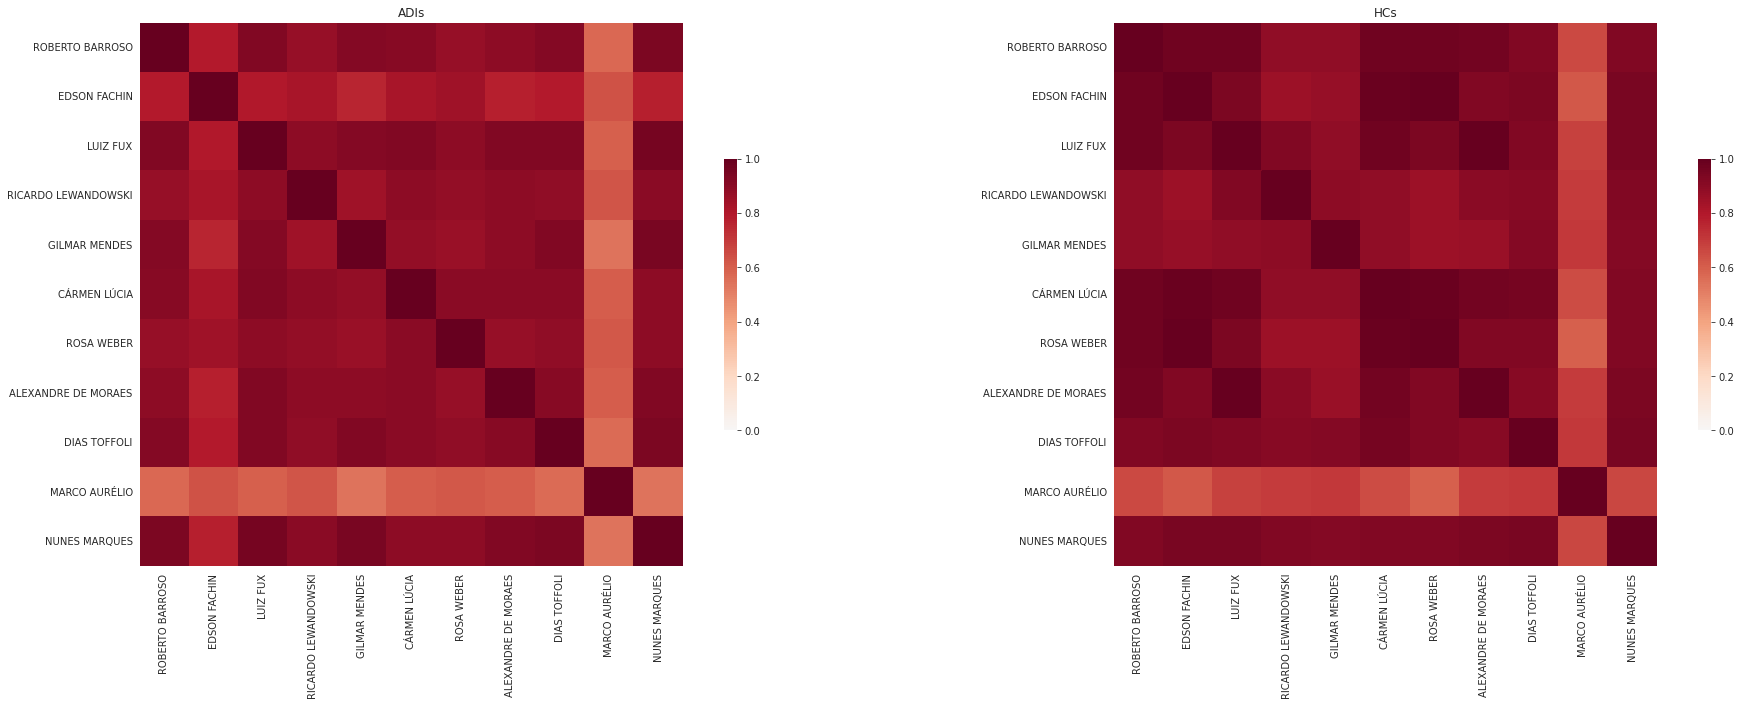

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# n is the number of subjects or items that will determine the size of the correlation matrix. 
##n = 20 
##data_length = 50
##nr = .58

# Random data
##np.random.seed(0)
##m1_u = np.random.normal(loc=0, scale=1, size=(data_length, n))
##m2_u = nr*np.random.normal(loc=0, scale=1, size=(data_length, n)) + (1-nr)*m1_u

##m1 = pd.DataFrame(m1_u).corr()
##m2 = pd.DataFrame(m2_u).corr()
m1=df_ca
m2=df_ch


f,axes = plt.subplots(1,2, figsize=(32,10))
sns.set_style("white")
titles = ["ADIs","HCs"]
for ix, m in enumerate([m1,m2]):
  sns.heatmap(m, cmap="RdBu_r", center=0, vmin=0, vmax=1, ax=axes[ix], square=True, cbar_kws={"shrink": .5}, xticklabels=True)
  #sns.heatmap(m, cmap="RdBu_r", center=0, vmin=0, vmax=1, ax=axes[ix], annot=True, square=True, cbar_kws={"shrink": .5},  xticklabels=True)
  axes[ix].set(title=titles[ix])

## Correlações de Pearson
---



In [48]:
stats.pearsonr(upper(df_ca),upper(df_ch))

(0.8703540632583555, 6.161081789618513e-18)

#Matriz de Distância

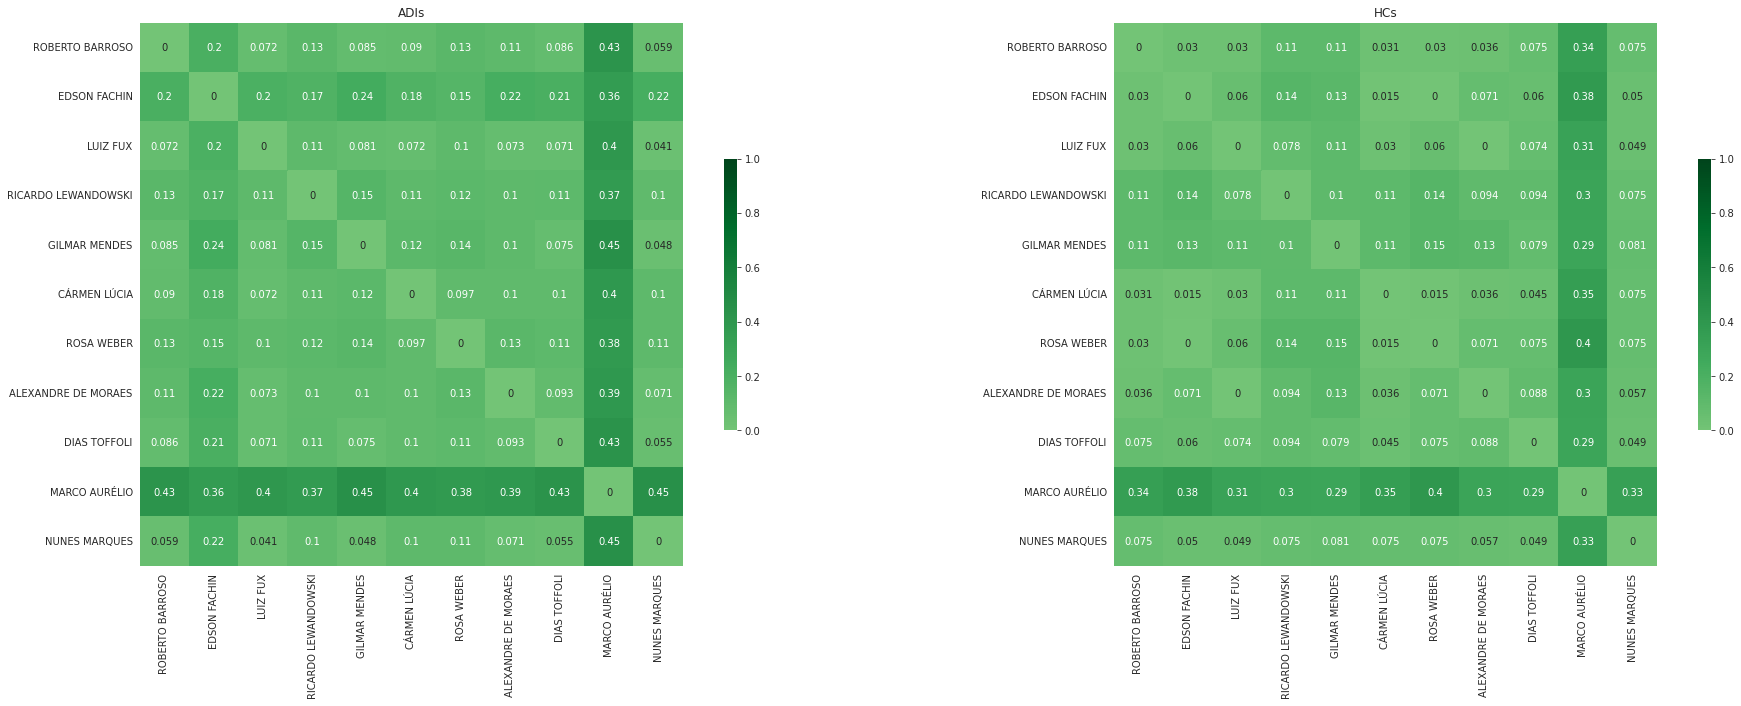

In [49]:
m1=da
m2=dh


f,axes = plt.subplots(1,2, figsize=(32,10))
sns.set_style("white")

titles = ["ADIs","HCs"]
for ix, m in enumerate([m1,m2]):
  #sns.heatmap(m, cmap="RdBu_r", center=0, vmin=0, vmax=1, ax=axes[ix], square=True, cbar_kws={"shrink": .5}, xticklabels=True)
  sns.heatmap(m, cmap="Greens", center=0, vmin=0, vmax=1, ax=axes[ix], annot=True, square=True, cbar_kws={"shrink": .5},  xticklabels=True)
  axes[ix].set(title=titles[ix])

#Matrizes (para criar arquivo de distâncias para Orange, copiar daqui)

In [50]:
da

,ROBERTO BARROSO,EDSON FACHIN,LUIZ FUX,RICARDO LEWANDOWSKI,GILMAR MENDES,CÁRMEN LÚCIA,ROSA WEBER,ALEXANDRE DE MORAES,DIAS TOFFOLI,MARCO AURÉLIO,NUNES MARQUES
ROBERTO BARROSO,0.000000,0.204054,0.071719,0.126685,0.085020,0.089552,0.129076,0.105978,0.085915,0.426559,0.059361
EDSON FACHIN,0.204054,0.000000,0.200271,0.173854,0.241565,0.179104,0.151967,0.221467,0.206751,0.362173,0.220957
LUIZ FUX,0.071719,0.200271,0.000000,0.107962,0.081081,0.071913,0.104620,0.073469,0.070522,0.399194,0.041096
RICARDO LEWANDOWSKI,0.126685,0.173854,0.107962,0.000000,0.150740,0.105548,0.121951,0.102981,0.110955,0.374749,0.100228
GILMAR MENDES,0.085020,0.241565,0.081081,0.150740,0.000000,0.123306,0.137042,0.104478,0.074543,0.454910,0.047945
CÁRMEN LÚCIA,0.089552,0.179104,0.071913,0.105548,0.123306,0.000000,0.096862,0.100955,0.100141,0.396761,0.102740
ROSA WEBER,0.129076,0.151967,0.104620,0.121951,0.137042,0.096862,0.000000,0.128415,0.114569,0.377282,0.105023
ALEXANDRE DE MORAES,0.105978,0.221467,0.073469,0.102981,0.104478,0.100955,0.128415,0.000000,0.093220,0.393509,0.070938
DIAS TOFFOLI,0.085915,0.206751,0.070522,0.110955,0.074543,0.100141,0.114569,0.093220,0.000000,0.429787,0.055046
MARCO AURÉLIO,0.426559,0.362173,0.399194,0.374749,0.454910,0.396761,0.377282,0.393509,0.429787,0.000000,0.454082


In [51]:
dh

,ROBERTO BARROSO,EDSON FACHIN,LUIZ FUX,RICARDO LEWANDOWSKI,GILMAR MENDES,CÁRMEN LÚCIA,ROSA WEBER,ALEXANDRE DE MORAES,DIAS TOFFOLI,MARCO AURÉLIO,NUNES MARQUES
ROBERTO BARROSO,0.000000,0.030303,0.029851,0.111111,0.112903,0.030769,0.030303,0.035714,0.074627,0.340000,0.075000
EDSON FACHIN,0.030303,0.000000,0.059701,0.142857,0.129032,0.015385,0.000000,0.071429,0.059701,0.380000,0.050000
LUIZ FUX,0.029851,0.059701,0.000000,0.078125,0.111111,0.030303,0.059701,0.000000,0.073529,0.313725,0.048780
RICARDO LEWANDOWSKI,0.111111,0.142857,0.078125,0.000000,0.101695,0.112903,0.142857,0.094340,0.093750,0.297872,0.075000
GILMAR MENDES,0.112903,0.129032,0.111111,0.101695,0.000000,0.114754,0.145161,0.134615,0.079365,0.291667,0.081081
CÁRMEN LÚCIA,0.030769,0.015385,0.030303,0.112903,0.114754,0.000000,0.015385,0.036364,0.045455,0.346939,0.075000
ROSA WEBER,0.030303,0.000000,0.059701,0.142857,0.145161,0.015385,0.000000,0.071429,0.074627,0.400000,0.075000
ALEXANDRE DE MORAES,0.035714,0.071429,0.000000,0.094340,0.134615,0.036364,0.071429,0.000000,0.087719,0.302326,0.057143
DIAS TOFFOLI,0.074627,0.059701,0.073529,0.093750,0.079365,0.045455,0.074627,0.087719,0.000000,0.294118,0.048780
MARCO AURÉLIO,0.340000,0.380000,0.313725,0.297872,0.291667,0.346939,0.400000,0.302326,0.294118,0.000000,0.333333


In [52]:
def countcorr(m,th=0.5):
    u = upper(m)
    nupper  = float(len(u))
    npos = len(u[u > th])
    nneg = len(u[u <= th])
    return (100*nneg/nupper,100*npos/nupper)

(nneg1,npos1) = countcorr(df_ca)
(nneg2,npos2) = countcorr(df_ch)
print("*"*100)
print(f"[m1] número de ministros concordantes : {npos1}%")
print(f"[m1] número de ministros discordantes : {nneg1}%")
print("*"*100)
print(f"[m2] número de ministros concordantes : {npos2}%")
print(f"[m2] número de ministros discordantes : {nneg2}%")
print("*"*100)



****************************************************************************************************
[m1] número de ministros concordantes : 100.0%
[m1] número de ministros discordantes : 0.0%
****************************************************************************************************
[m2] número de ministros concordantes : 100.0%
[m2] número de ministros discordantes : 0.0%
****************************************************************************************************


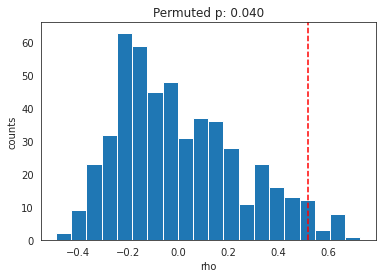

In [53]:
"""Nonparametric permutation testing Monte Carlo"""
np.random.seed(0)
rhos = []
n_iter = 500
true_rho, _ = stats.spearmanr(upper(m1), upper(m2))
# matrix permutation, shuffle the groups
m_ids = list(m1.columns)
m2_v = upper(m2)
for iter in range(n_iter):
  np.random.shuffle(m_ids) # shuffle list 
  r, _ = stats.spearmanr(upper(m1.loc[m_ids, m_ids]), m2_v)  
  rhos.append(r)
perm_p = ((np.sum(np.abs(true_rho) <= np.abs(rhos)))+1)/(n_iter+1) # two-tailed test


f,ax = plt.subplots()
plt.hist(rhos,bins=20)
ax.axvline(true_rho,  color = 'r', linestyle='--')
ax.set(title=f"Permuted p: {perm_p:.3f}", ylabel="counts", xlabel="rho")
plt.show()

In [54]:
m1

,ROBERTO BARROSO,EDSON FACHIN,LUIZ FUX,RICARDO LEWANDOWSKI,GILMAR MENDES,CÁRMEN LÚCIA,ROSA WEBER,ALEXANDRE DE MORAES,DIAS TOFFOLI,MARCO AURÉLIO,NUNES MARQUES
ROBERTO BARROSO,0.000000,0.204054,0.071719,0.126685,0.085020,0.089552,0.129076,0.105978,0.085915,0.426559,0.059361
EDSON FACHIN,0.204054,0.000000,0.200271,0.173854,0.241565,0.179104,0.151967,0.221467,0.206751,0.362173,0.220957
LUIZ FUX,0.071719,0.200271,0.000000,0.107962,0.081081,0.071913,0.104620,0.073469,0.070522,0.399194,0.041096
RICARDO LEWANDOWSKI,0.126685,0.173854,0.107962,0.000000,0.150740,0.105548,0.121951,0.102981,0.110955,0.374749,0.100228
GILMAR MENDES,0.085020,0.241565,0.081081,0.150740,0.000000,0.123306,0.137042,0.104478,0.074543,0.454910,0.047945
CÁRMEN LÚCIA,0.089552,0.179104,0.071913,0.105548,0.123306,0.000000,0.096862,0.100955,0.100141,0.396761,0.102740
ROSA WEBER,0.129076,0.151967,0.104620,0.121951,0.137042,0.096862,0.000000,0.128415,0.114569,0.377282,0.105023
ALEXANDRE DE MORAES,0.105978,0.221467,0.073469,0.102981,0.104478,0.100955,0.128415,0.000000,0.093220,0.393509,0.070938
DIAS TOFFOLI,0.085915,0.206751,0.070522,0.110955,0.074543,0.100141,0.114569,0.093220,0.000000,0.429787,0.055046
MARCO AURÉLIO,0.426559,0.362173,0.399194,0.374749,0.454910,0.396761,0.377282,0.393509,0.429787,0.000000,0.454082


#Referência

CHEONG, Jin Hyun. How to measure similarity between two correlation matrices. 2021. Disponível em: https://towardsdatascience.com/how-to-measure-similarity-between-two-correlation-matrices-ce2ea13d8231. Acesso em: 12 set. 2022.